# 004: Implement logistic regression

needs data loading, train/test split, training, evaluation

In [ ]:
import sys

import matplotlib.pyplot as plt 
import numpy as np

sys.path.append("../")
import helpers
from implementations import sigmoid
from metrics import f_score
from models import LogisticRegression
from visualizations import plot_roc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [20]:
model = LogisticRegression(metric=f_score)
max_samples = 100000
model.train(X=x_train[:max_samples], y=y_train[:max_samples], verbose=False)

LogRegTrainResult(iterations=514, train_losses=[0.6931471805599453, 0.8134193679166892, 0.7042510630224031, 0.6646246074041735, 0.6490698122715332, 0.6355554345129384, 0.6235193897083225, 0.612593610927042, 0.6026814799352672, 0.5936766805087887, 0.5854872082174116, 0.5780281913298305, 0.5712230902335871, 0.5650032565198395, 0.5593075239085913, 0.5540816002343409, 0.5492774080563019, 0.5448524197216374, 0.5407690236246461, 0.536993939397547, 0.533497689804852, 0.5302541306386441, 0.5272400362885121, 0.5244347367602793, 0.5218198011022358, 0.5193787620244495, 0.5170968766874353, 0.51496091901579, 0.5129589993535804, 0.5110804077581307, 0.5093154776918899, 0.5076554672999054, 0.5060924558450963, 0.5046192532132078, 0.5032293206955838, 0.501916701514103, 0.5006759597728859, 0.4995021267099737, 0.4983906532832603, 0.4973373682622878, 0.496338441114533, 0.4953903490744825, 0.4944898478687245, 0.49363394564269003, 0.4928198796964747, 0.492045095689968, 0.49130722902268154, 0.4906040881323676

(array([28884., 15643., 10608.,  8595.,  7274.,  6974.,  6462.,  6219.,
         5698.,  3643.]),
 array([1.26454497e-05, 9.97004345e-02, 1.99388224e-01, 2.99076013e-01,
        3.98763802e-01, 4.98451591e-01, 5.98139380e-01, 6.97827169e-01,
        7.97514958e-01, 8.97202747e-01, 9.96890536e-01]),
 <BarContainer object of 10 artists>)

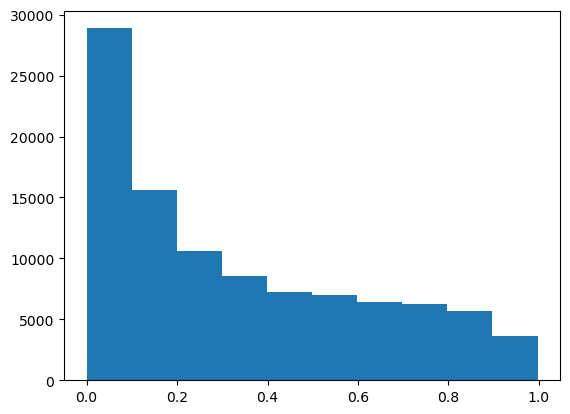

In [21]:
plt.hist(sigmoid(x_train[:max_samples] @ model.weights))

Threshold: 0.00, F1 Score: 0.1600
Threshold: 0.01, F1 Score: 0.1610
Threshold: 0.02, F1 Score: 0.1660
Threshold: 0.03, F1 Score: 0.1724
Threshold: 0.04, F1 Score: 0.1794
Threshold: 0.05, F1 Score: 0.1860
Threshold: 0.06, F1 Score: 0.1923
Threshold: 0.07, F1 Score: 0.1984
Threshold: 0.08, F1 Score: 0.2041
Threshold: 0.09, F1 Score: 0.2095
Threshold: 0.10, F1 Score: 0.2149
Threshold: 0.11, F1 Score: 0.2198
Threshold: 0.12, F1 Score: 0.2247
Threshold: 0.13, F1 Score: 0.2295
Threshold: 0.14, F1 Score: 0.2341
Threshold: 0.15, F1 Score: 0.2387
Threshold: 0.16, F1 Score: 0.2432
Threshold: 0.17, F1 Score: 0.2473
Threshold: 0.18, F1 Score: 0.2517
Threshold: 0.19, F1 Score: 0.2556
Threshold: 0.20, F1 Score: 0.2600
Threshold: 0.21, F1 Score: 0.2643
Threshold: 0.22, F1 Score: 0.2680
Threshold: 0.23, F1 Score: 0.2718
Threshold: 0.24, F1 Score: 0.2756
Threshold: 0.25, F1 Score: 0.2796
Threshold: 0.26, F1 Score: 0.2835
Threshold: 0.27, F1 Score: 0.2871
Threshold: 0.28, F1 Score: 0.2908
Threshold: 0.2

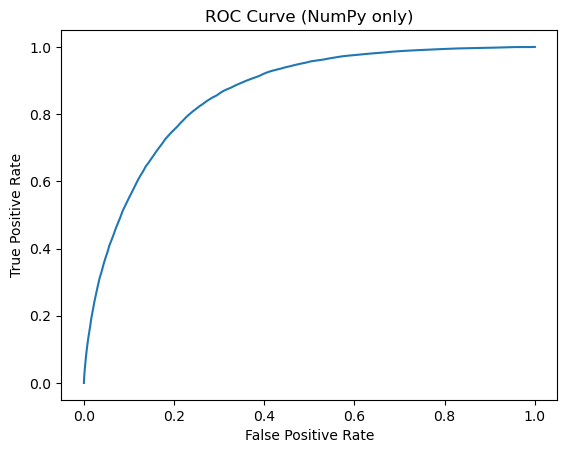

In [22]:
y_score = sigmoid(x_train[max_samples:max_samples * 2] @ model.weights)
y_true = y_train[max_samples:max_samples * 2].astype(int)
plot_roc(y_score, y_true)

# make predictions on test set

In [ ]:
test = np.load("../data/dataset_prep/test.npz")
x_test = test["x_test"]
test_ids = test["test_ids"]


In [133]:
x_test.shape

(109379, 316)

In [144]:
pred = (2 * ((sigmoid(x_test @ w) > 0.7) - 0.5)).astype(int).reshape(-1)

In [145]:
helpers.create_csv_submission(test_ids, pred, "../data/logistic_regression.csv")